In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date,timedelta,datetime

In [2]:
print(yf.__version__)

0.2.61


In [3]:
tck= yf.Ticker('TEL.OL')

start_date = "2013-01-01"  
df= tck.dividends[start_date:].to_frame()

In [ ]:
prices = [] 

for index,row in df.iterrows():
    tckdate = datetime.strptime(str(index),'%Y-%m-%d %H:%M:%S%z').date()
    try:
        price = tck.history(start=tckdate,interval='1d')['Close'][0]
    except:
        price = None
    prices.append(price)    

df['Price'] = prices
df['DividendYield'] = (df['Dividends'] / df['Price']).round(2) * 100


In [9]:
df

,Dividends,Price,DividendYield
Date,,,
2013-05-16 00:00:00+02:00,6.0,63.927090,9.0
2014-05-15 00:00:00+02:00,7.0,75.007614,9.0
2015-05-21 00:00:00+02:00,3.8,94.484406,4.0
2015-11-02 00:00:00+01:00,3.5,87.907150,4.0
2016-05-12 00:00:00+02:00,4.0,75.974037,5.0
2016-10-28 00:00:00+02:00,3.5,76.353867,5.0
2017-05-11 00:00:00+02:00,4.3,80.175980,5.0
2017-10-27 00:00:00+02:00,3.5,105.453026,3.0
2018-05-03 00:00:00+02:00,4.2,109.044235,4.0


In [10]:
r_df= df.resample('Y').agg('sum')

The columns in the DataFrame are: Index(['Dividends', 'Price', 'DividendYield', 'Year'], dtype='object')


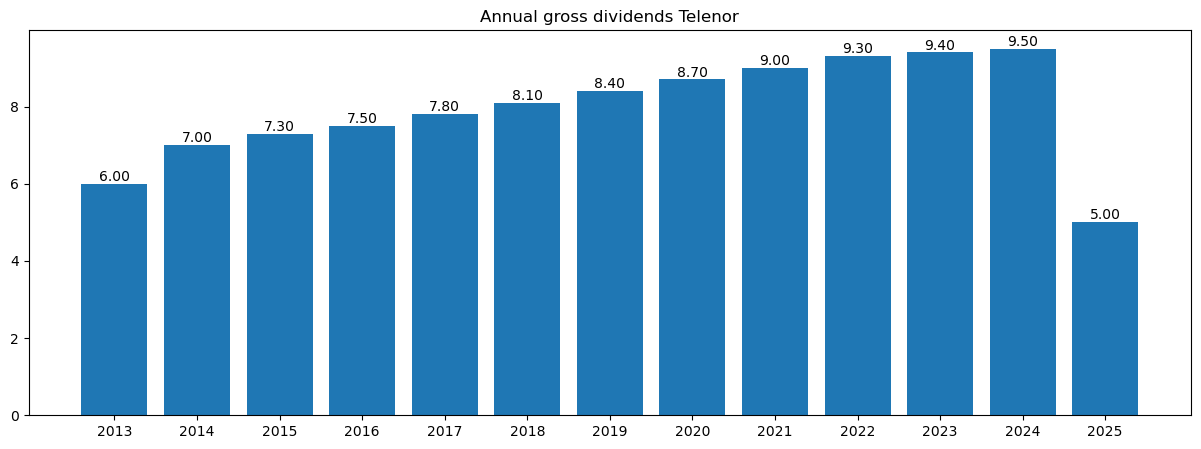

Total gross dividends 103.0 


In [16]:
columns = r_df.columns
print(f'The columns in the DataFrame are: {columns}')
r_df['Year'] = r_df.index.year
rf_df = r_df[r_df['Year'] > 2005 ]

plt.figure(figsize=(15,5))
bars= plt.bar(rf_df['Year'], rf_df['Dividends'])
plt.xticks(rf_df['Year'])
plt.title("Annual gross dividends Telenor")  # Add this line

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')    
plt.show()

totaldiv = rf_df['Dividends'].sum()

print(f"Total gross dividends {totaldiv} ")

Dividends from shares are taxed in Belgium. This tax is called the witholding tax (WHT) and is currently 30% in Belgium (July 2025). Foreign dividends are subject to double taxation, meaning that they are both taxed in the country of origin and again in Belgium. Even when a witholding tax (WHT) has already been applied abroad - the net dividend received is again taxed at a flat rate of 30%.

In Norway the witholding tax is 25%, so the 103 NOK gross dividend taxed leaves 75 NOK which is again taxed at 30% in Belgium, resulting in just 46.35 EUR NOK income.

Although double tax treaties exist to mitigate this burden for some countries, they often fail to eliminate it entirely, and Belgian residents must actively claim any foreign tax credits. The reclaiming of foreign tax credits is a cumbersome administrative process and not all brokers are able to assist you with this.